<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/cifar_10_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize image pixel values to [0, 1] for easier interpolation
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class labels for CIFAR-10
class_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print("CIFAR-10 dataset loaded!")
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print("Classes:", class_labels)

CIFAR-10 dataset loaded!
Training samples: 50000
Test samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
# Select all images from the 'airplane' (class 0) and 'ship' (class 8) classes
class_a = 0  # airplane
class_b = 8  # ship

airplane_images = x_train[y_train.flatten() == class_a]
ship_images = x_train[y_train.flatten() == class_b]

# Randomly select 9 pairs of images (one from each class)
np.random.seed(42)  # For reproducibility
pairs = [(airplane_images[np.random.randint(len(airplane_images))],
          ship_images[np.random.randint(len(ship_images))]) for _ in range(9)]

In [8]:
# Define interpolation function
def interpolate_images(image1, image2, alpha=0.5):
    """
    Interpolate between two images using the formula:
    interpolated_image = (1 - alpha) * image1 + alpha * image2
    """
    return (1 - alpha) * image1 + alpha * image2

# Interpolate each pair with alpha=0.5
interpolated_images = [interpolate_images(pair[0], pair[1], alpha=0.5) for pair in pairs]

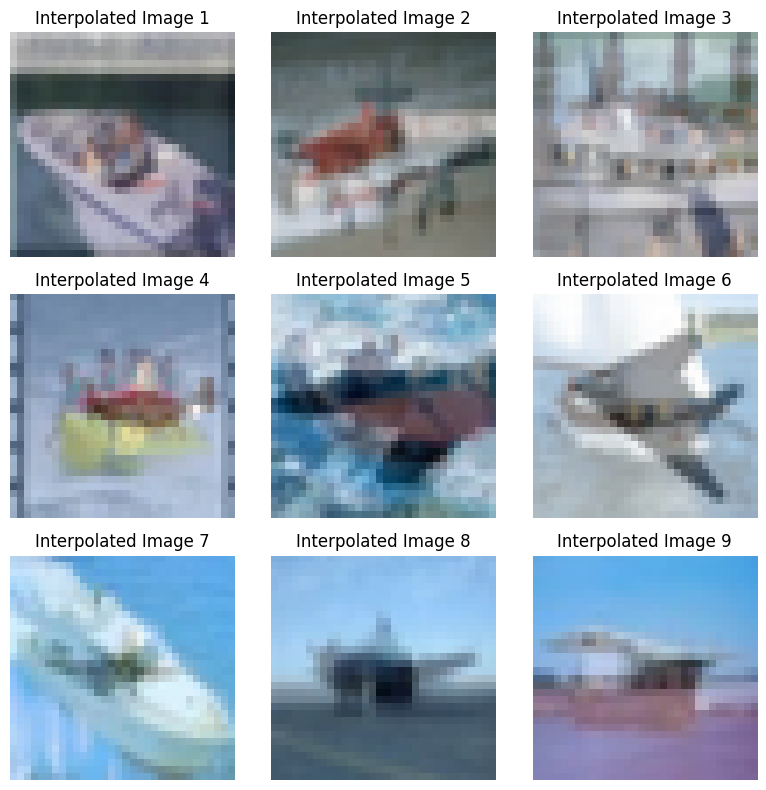

In [9]:
# Plot the interpolated images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i, interpolated_image in enumerate(interpolated_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(interpolated_image)
    plt.title(f"Interpolated Image {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()